# –¶–∏—Ñ—Ä–æ–≤–æ–µ –ø—Ä–µ–¥—Å—Ç–∞–≤–ª–µ–Ω–∏–µ –æ—Å–Ω–æ–≤–Ω—ã—Ö —Ç–∏–ø–æ–≤ –¥–∞–Ω–Ω—ã—Ö

## 1. –ì—Ä–∞—Ñ–∏—á–µ—Å–∫–∏–µ –¥–∞–Ω–Ω—ã–µ

In [2]:
import matplotlib.pyplot as plt
#from matplotlib.image import imread
from skimage.io import imread

url = 'https://www.osp.ru/FileStorage/DOCUMENTS_ILLUSTRATIONS/13234504/original.jpg'
orig_img = imread(url)


plt.imshow(orig_img)
plt.show()

print(orig_img.shape)
print(orig_img)

(400, 600, 3)
[[[218 149 167]
  [215 146 164]
  [211 144 161]
  ...
  [117 146 162]
  [116 145 161]
  [116 145 161]]

 [[215 148 165]
  [212 145 162]
  [207 143 159]
  ...
  [116 145 161]
  [116 145 161]
  [116 145 161]]

 [[209 147 162]
  [206 144 159]
  [202 141 156]
  ...
  [114 143 159]
  [114 143 159]
  [114 143 159]]

 ...

 [[104 146 171]
  [103 147 172]
  [105 149 174]
  ...
  [115 146 174]
  [115 146 174]
  [115 146 174]]

 [[106 145 174]
  [107 146 175]
  [109 148 177]
  ...
  [115 146 174]
  [116 147 175]
  [116 147 175]]

 [[108 145 174]
  [109 146 175]
  [109 148 177]
  ...
  [116 147 175]
  [116 147 175]
  [117 148 176]]]


## –î–ó ‚Ññ1

1. –ü–æ–º–µ—Å—Ç–∏—Ç—å –≤ —Ü–µ–Ω—Ç—Ä —Ä–∏—Å—É–Ω–∫–∞ –±–µ–ª—ã–π –∫–≤–∞–¥—Ä–∞—Ç, –∑–∞–Ω–∏–º–∞—é—â–∏–π 10% –ø–ª–æ—â–∞–¥–∏ —Ä–∏—Å—É–Ω–∫–∞.

## 2. –í–∏–¥–µ–æ –∏ –∑–≤—É–∫

### –í–∏–¥–µ–æ –ø–æ—Ç–æ–∫

```python
pip install opencv-python
```

In [3]:
import cv2
from datetime import datetime

capture = cv2.VideoCapture(0 + cv2.CAP_DSHOW)

while True:
    rtrn, image = capture.read()
    if image is None: 
        from skimage import io
        image = io.imread('https://www.osp.ru/FileStorage/DOCUMENTS_ILLUSTRATIONS/13234504/original.jpg');
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    now = datetime.now()
    date_time = now.strftime("%d/%m/%Y, %H:%M:%S")
    cv2.putText(image, date_time, (10, 50), cv2.FONT_HERSHEY_SIMPLEX, 1., (0,255,255), 2)
    cv2.imshow("OpenCV", image) 
    
    if cv2.waitKey(1) == 27: 
        break

capture.release()
cv2.destroyAllWindows()

## –î–ó ‚Ññ2

1. –ü–æ–º–µ—Å—Ç–∏—Ç—å –≤ –≤ —Å–ª—É—á–∞–π–Ω–æ–º –º–µ—Å—Ç–µ –∫–∞–∂–¥–æ–≥–æ –∫–∞–¥—Ä–∞ –≤–∏–¥–µ–æ–ø–æ—Ç–æ–∫–∞ –±–µ–ª—ã–π –∫–≤–∞—Ä–∞—Ç —Å–æ —Å—Ç–æ—Ä–æ–Ω–æ–π 50 px.

### –ê—É–¥–∏–æ –¥–∞–Ω–Ω—ã–µ

```python
pip install librosa
```

#### ESC-50: Dataset for Environmental Sound Classification

https://dagshub.com/kinkusuma/esc50-dataset

In [4]:
import numpy as np
import librosa
import soundfile as sf
import io
from six.moves.urllib.request import urlopen

audio_data = 'https://dagshub.com/kinkusuma/esc50-dataset/raw/3b812aa828f357df417069600a096c31816c5ef3/dataset/1-17970-A-4.wav'
data, sample_rate = sf.read(io.BytesIO(urlopen(audio_data).read()))
#data, sample_rate = librosa.load(audio_data, sr=None)

In [5]:
import IPython.display as ipd
ipd.Audio(audio_data)

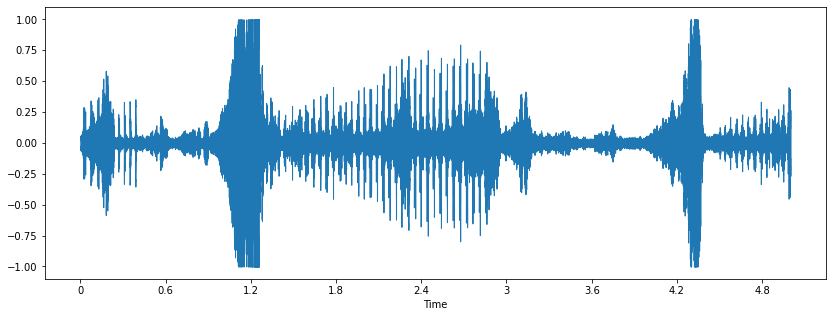

In [6]:
import matplotlib.pyplot as plt
import librosa.display

plt.figure(figsize=(14, 5))
librosa.display.waveshow(data, sr=sample_rate)

In [6]:
left = 0
right = 220000

print(data.shape)
print(data[left:right].max() - data[left:right].min())

(220500,)
1.999969482421875


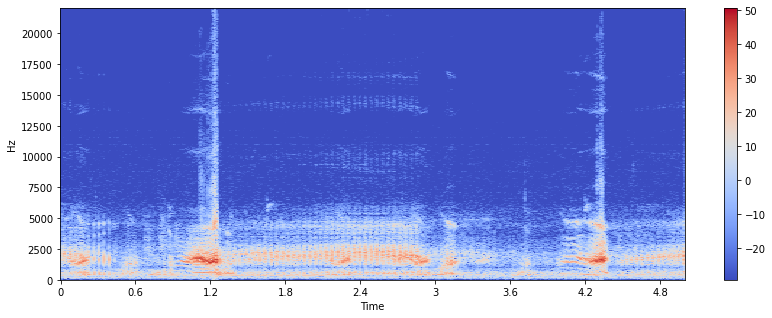

In [7]:
X = librosa.stft(data)
Xdb = librosa.amplitude_to_db(abs(X))

plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sample_rate, x_axis='time', y_axis='hz')
plt.colorbar()

In [9]:
three_seconds = sample_rate * 3
data_ = data[:three_seconds]

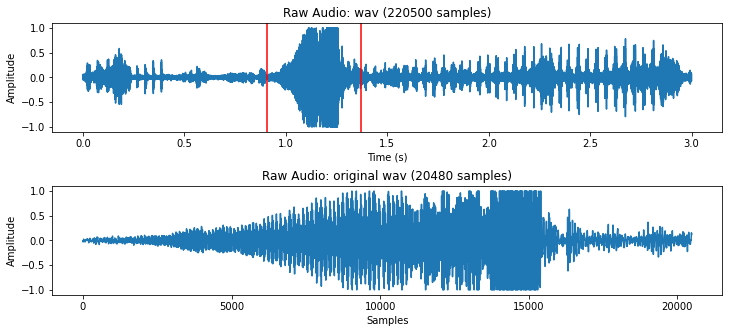

In [10]:
timesteps = np.arange(len(data_)) / sample_rate  # in seconds

fig, ax = plt.subplots(2, figsize=(12, 5))
fig.subplots_adjust(hspace=0.5)

# plot the entire clip 
ax[0].plot(timesteps, data_)
ax[0].set_xlabel('Time (s)')
ax[0].set_ylabel('Amplitude')
ax[0].set_title('Raw Audio: {} ({} samples)'.format('wav', len(data)))


n_fft = 1024*20 # frame length 
start = 40000 # start at a part of the sound thats not silence.. 
x = data_[start:start+n_fft]

# mark location of frame in the entire signal
ax[0].axvline(start/sample_rate, c='r') 
ax[0].axvline((start+n_fft)/sample_rate, c='r')

# plot N samples 
ax[1].plot(x)
ax[1].set_xlabel('Samples')
ax[1].set_ylabel('Amplitude')
ax[1].set_title('Raw Audio: {} ({} samples)'.format('original wav', len(x)));

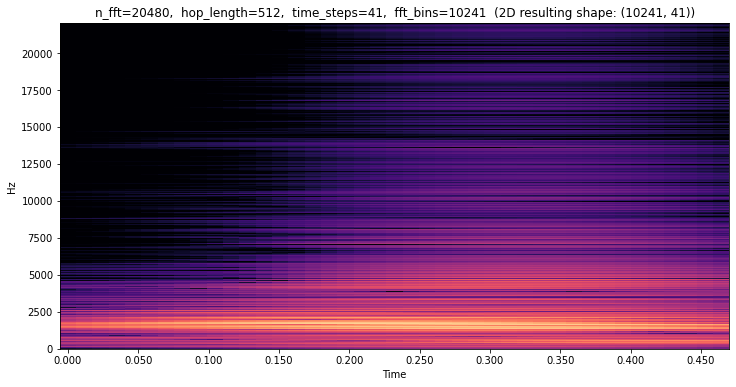

In [10]:
hop_length = 512
stft = librosa.stft(x, n_fft=n_fft, hop_length=hop_length)
stft_magnitude, stft_phase = librosa.magphase(stft)
stft_magnitude_db = librosa.amplitude_to_db(stft_magnitude, ref=np.max)

plt.figure(figsize=(12, 6))
librosa.display.specshow(stft_magnitude_db, x_axis='time', y_axis='linear', 
                         sr=sample_rate, hop_length=hop_length)

title = 'n_fft={},  hop_length={},  time_steps={},  fft_bins={}  (2D resulting shape: {})'
plt.title(title.format(n_fft, hop_length, 
                       stft_magnitude_db.shape[1], 
                       stft_magnitude_db.shape[0], 
                       stft_magnitude_db.shape));

## –î–ó ‚Ññ3

1. –ù–∞–π—Ç–∏ –≤ –æ–±—É—á–∞—é—â–µ–º –Ω–∞–±–æ—Ä–µ esc50-dataset WAV —Ñ–∞–π–ª —Å –ª–∞–µ–º —Å–æ–±–∞–∫–∏;
2. –≤–∏–∑—É–∞–ª—å–Ω–æ –ø–æ –≥—Ä–∞—Ñ–∏–∫—É –∞–º–ø–ª–∏—Ç—É–¥—ã –∑–≤—É–∫–æ–≤–æ–π –≤–æ–ª–Ω—ã –Ω–∞–π—Ç–∏ —É—á–∞—Å—Ç–æ–∫ —Ñ–∞–π–ª–∞ –Ω–µ–ø–æ—Å—Ä–µ–¥—Å—Ç–≤–µ–Ω–Ω–æ —Å–æ–¥–µ—Ä–∂–∞—â–∏–π –∑–≤—É–∫ –ª–∞—è;
3. –ø–æ—Å—Ç—Ä–æ–∏—Ç—å —Å–ø–µ–∫—Ç—Ä–æ–≥—Ä–∞–º–º—É –¥–ª—è –Ω–∞–π–¥–µ–Ω–Ω–æ–≥–æ —É—á–∞—Å—Ç–∫–∞;
4. –ø–æ–¥—É–º–∞—Ç—å (–∏ —Ä–µ–∞–ª–∏–∑–æ–≤–∞—Ç—å), –∫–∞–∫ —Å –ø–æ–º–æ—â–∏—å—é —Ü–∏—Ñ—Ä–æ–≤–æ–≥–æ –ø—Ä–µ–¥—Å—Ç–∞–≤–ª–µ–Ω–∏—è –∑–≤—É–∫–∞ –º–æ–∂–Ω–æ –∞–≤—Ç–æ–º–∞—Ç–∏–∑–∏—Ä–æ–≤–∞—Ç—å —É–¥–∞–ª–µ–Ω–∏–µ —á–∞—Å—Ç–∏ —Ñ–∞–π–ª–∞, –Ω–µ —Å–æ–¥–µ—Ä–∂–∞—â–µ–≥–æ –ø–æ–ª–µ–∑–Ω–æ–π –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–∏.

## 3. –¢–∞–±–ª–∏—Ü—ã –∏ –≤—Ä–µ–º–µ–Ω–Ω—ã–µ —Ä—è–¥—ã

In [11]:
import pandas as pd

url = 'https://raw.githubusercontent.com/pcsanwald/kaggle-titanic/master/train.csv'
df = pd.read_csv(url, on_bad_lines='skip', delimiter=',')
df.head()

survived  pclass                                               name  \
0         0       3                            Braund, Mr. Owen Harris   
1         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2         1       3                             Heikkinen, Miss. Laina   
3         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4         0       3                           Allen, Mr. William Henry   

      sex   age  sibsp  parch            ticket     fare cabin embarked  
0    male  22.0      1      0         A/5 21171   7.2500   NaN        S  
1  female  38.0      1      0          PC 17599  71.2833   C85        C  
2  female  26.0      0      0  STON/O2. 3101282   7.9250   NaN        S  
3  female  35.0      1      0            113803  53.1000  C123        S  
4    male  35.0      0      0            373450   8.0500   NaN        S

[[0.000e+00 5.800e+01]
 [1.000e+00 6.300e+01]
 [2.000e+00 7.000e+01]
 ...
 [3.074e+03 1.800e+01]
 [3.075e+03 3.100e+01]
 [3.076e+03 2.900e+01]]


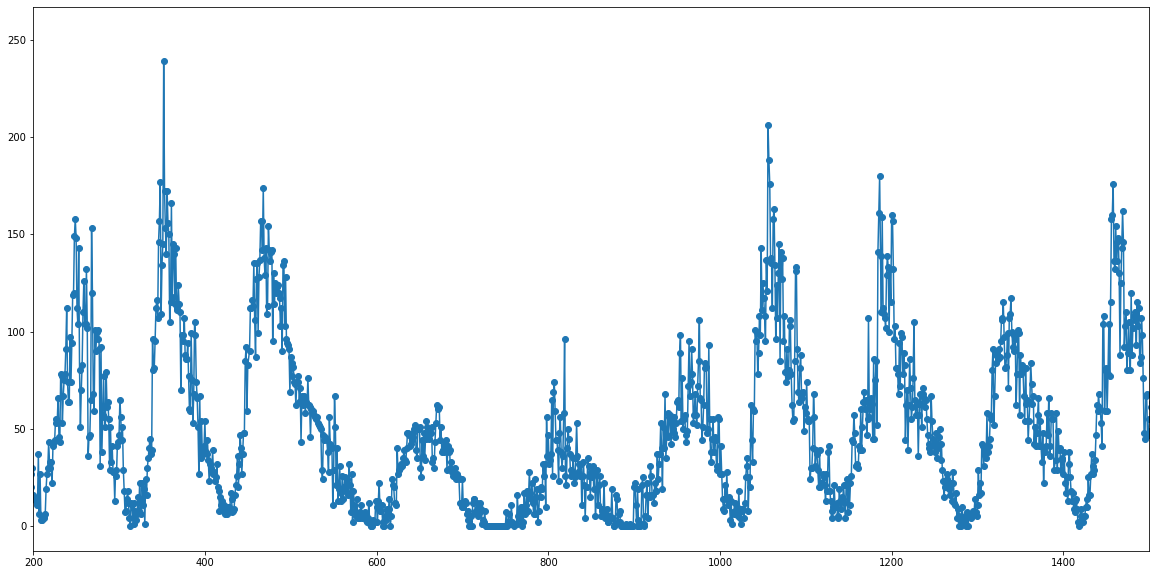

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import requests

series = np.empty((0,2), dtype='f')

url = 'https://raw.githubusercontent.com/sjackman/bc/master/data/astro/sunspot.txt'
response = requests.get(url)
data = response.text
data = data.split("\n") # then split it into lines

#print(data)
for i,line in enumerate(data):
    if i<3: continue
    words = line.split()
    if len(words) < 6: continue
    #print([[i-3], float(words[-1])])
    series = np.append(series, [[i-3, float(words[-1])]], axis=0)
    
print(series)
X = series[:,0] 
y = series[:,1]

plt.figure(figsize=(20,10))
plt.plot(X,y)
plt.scatter(X,y)
plt.xlim(200,1500)
plt.show()

In [13]:
def moving_average(series, windowsize):
    result = [series[windowsize-1]]
    for t in range(windowsize,len(series)):
        result.append(sum(series[t-n] for n in range(windowsize)) / (windowsize))
    return result
    
k = 50
y_ma = moving_average(y,k)

plt.figure(figsize=(20,10))
plt.plot(X,y)
plt.scatter(X,y)
plt.plot(X[k-1:], y_ma, c='r', linewidth=3)
plt.xlim(200,1500)
plt.show()

### –ú–µ—Å—Ç–æ–ø–æ–ª–æ–∂–µ–Ω–∏–µ –∞–≤—Ç–æ–±—É—Å–æ–≤ –≥–æ—Ä–æ–¥–∞ –ö–∞–∑–∞–Ω–∏

http://data.kzn.ru/dinamic_datasets/bus

In [14]:
import urllib.request
import json

url = "http://data.kzn.ru:8082/api/v0/dynamic_datasets/bus.json"
req = urllib.request.Request(url)
r = urllib.request.urlopen(req).read()
data = json.loads(r.decode('utf-8'))
print(data[0])

{'updated_at': '2022-07-08 15:24:53 (Europe/Moscow)', 'data': {'GaragNumb': '2663', 'Marsh': '6', 'Graph': '8', 'Smena': '1', 'TimeNav': '08.07.2022 15:24:53', 'Latitude': '55.837639', 'Longitude': '49.081159', 'Speed': '0', 'Azimuth': '1'}}


In [15]:
url = "http://data.kzn.ru:8082/api/v0/dynamic_datasets/bus/2663.json"
req = urllib.request.Request(url)
r = urllib.request.urlopen(req).read()
data = json.loads(r.decode('utf-8'))
print(data)

{'updated_at': '2022-07-08 15:24:53 (Europe/Moscow)', 'data': {'GaragNumb': '2663', 'Marsh': '6', 'Graph': '8', 'Smena': '1', 'TimeNav': '08.07.2022 15:24:53', 'Latitude': '55.837639', 'Longitude': '49.081159', 'Speed': '0', 'Azimuth': '1'}}


In [16]:
import numpy as np
import threading

location = []

run_num = 0
def run_check():    
    global run_num, location
    if run_num < 3:
        threading.Timer(100.0, run_check).start()
    url = "http://data.kzn.ru:8082/api/v0/dynamic_datasets/bus/2663.json"
    req = urllib.request.Request(url)
    r = urllib.request.urlopen(req).read()
    data = json.loads(r.decode('utf-8'))
    print(data['data']['Latitude'], data['data']['Longitude'])
    location.append([float(data['data']['Latitude']), float(data['data']['Longitude'])])
    run_num += 1
 
run_check()

55.841187 49.082653
55.842224 49.084283


In [7]:
location = [[55.841187, 49.082653], [55.842224, 49.084283]]
print(location)

[[55.841187, 49.082653], [55.842224, 49.084283]]


### –†–∞–±–æ—Ç–∞ —Å –≥–µ–æ–¥–∞–Ω–Ω—ã–º–∏ –≤ Python –∏ Jupyter

https://proglib.io/p/rabota-s-geodannymi-v-python-i-jupyter-2021-03-22

```python
pip install ipyleaflet
```

In [10]:
from ipyleaflet import AntPath, WidgetControl
from ipyleaflet import Map, Marker, Popup
from ipywidgets import IntSlider, jslink
from ipywidgets import HTML

m = Map(center=tuple(location[0]), zoom=13)

bus_path = AntPath(
    locations=location,
    dash_array=[1, 10],
    delay=1000,
    color='#9500ff',
    pulse_color='#9500ff'
)

m.add_layer(bus_path)

start_marker = Marker(location=tuple(location[0]))
m.add_layer(start_marker)

finish_marker = Marker(location=tuple(location[-1]))
m.add_layer(finish_marker)

start = HTML()
finish = HTML()
start.value = "–°—Ç–∞—Ä—Ç"                                                                      
finish.value = "–§–∏–Ω–∏—à!"                                                                      
start_marker.popup = start
finish_marker.popup = finish

zoom_slider = IntSlider(description='–ú–∞—Å—à—Ç–∞–±:', min=11, max=15, value=15)
jslink((zoom_slider, 'value'), (m, 'zoom'))
widget_control1 = WidgetControl(widget=zoom_slider, position='topright')
m.add_control(widget_control1)

m

Map(center=[55.841187, 49.082653], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title',‚Ä¶

## –î–ó ‚Ññ4

1. –í—ã–±—Ä–∞—Ç—å –ª—é–±–æ–π –∫–∞–∑–∞–Ω—Å–∫–∏–π –∞–≤—Ç–æ–±—É—Å–Ω—ã–π –º–∞—Ä—à—Ä—É—Ç;
2. –ø—Ä–æ—Å–ª–µ–¥–∏—Ç—å —Å –ø–æ–º–æ—â—å—é API —Å–∞–π—Ç–∞ data.kzn.ru –∑–∞ –∞–≤—Ç–æ–±—É—Å–æ–º –≤—ã–±—Ä–∞–Ω–Ω–æ–≥–æ –º–∞—Ä—à—Ä—É—Ç–∞ –¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –≤—Ä–µ–º–µ–Ω–∏, —á—Ç–æ–±—ã —Å—Ñ–æ—Ä–º–∏—Ä–æ–≤–∞—Ç—å –ø—Ä–µ–¥—Å—Ç–∞–≤–ª–µ–Ω–∏–µ –æ –≤—Å—ë–º –ø—É—Ç–∏ —Å–ª–µ–¥–æ–≤–∞–Ω–∏—è –∞–≤—Ç–æ–±—É—Å–∞;
3. –∏–∑–æ–±—Ä–∞–∑–∏—Ç—å –º–∞—Ä—à—Ä—É—Ç –Ω–∞ –∫–∞—Ä—Ç–µ; 
4. –ø–æ–¥—É–º–∞–π—Ç–µ, –∫–∞–∫ –Ω–∞–π—Ç–∏ –ø—Ä–∞–≤–∏–ª—å–Ω—ã–π —Ü–µ–Ω—Ç—Ä —Ä–∏—Å—É–Ω–∫–∞;
5. –ø–æ–¥—É–º–∞–π—Ç–µ –∫–∞–∫ –Ω–∞–π—Ç–∏ –∏ —É–∫–∞–∑–∞—Ç—å –Ω–∞ —Ä–∏—Å—É–Ω–∫–µ –æ—Å—Ç–∞–Ω–æ–≤–∫–∏ –≤—ã–±—Ä–∞–Ω–Ω–æ–≥–æ –º–∞—Ä—à—Ä—É—Ç–∞.

## 4. –¢–µ–∫—Å—Ç—ã

### –°–±–æ—Ä –¥–∞–Ω–Ω—ã—Ö —á–µ—Ä–µ–∑ VK API

1. –ê–≤—Ç–æ—Ä–∏–∑—É–π—Ç–µ—Å—å –í–ö–æ–Ω—Ç–∞–∫—Ç–µ –∏ –∑–∞–π–¥–∏—Ç–µ –Ω–∞ —Å—Ç—Ä–∞–Ω–∏—á–∫—É —Ä–∞–∑—Ä–∞–±–æ—Ç—á–∏–∫–æ–≤ **https://dev.vk.com/**

2. –ù–∞–∂–∏–º–∏—Ç–µ –Ω–∞ –∫–Ω–æ–ø–∫—É **"–°–æ–∑–¥–∞—Ç—å –ø—Ä–∏–ª–æ–∂–µ–Ω–∏–µ"**.

3. –í–≤–µ–¥–∏—Ç–µ –∏–º—è, —Ç–∏–ø Standalone, –Ω–∞–∂–∏—Ç–µ **"–ü–æ–¥–∫–ª—é—á–∏—Ç—å –ø—Ä–∏–ª–æ–∂–µ–Ω–∏–µ"**. 

4. –ü–æ–¥—Ç–≤–µ—Ä–¥–∏—Ç–µ –¥–µ–π—Å—Ç–≤–∏–µ.

5. –ü–æ—Å–ª–µ —Å–æ–∑–¥–∞–Ω–∏—è –ø—Ä–∏–ª–æ–∂–µ–Ω–∏—è –∑–∞–π–¥–∏—Ç–µ –≤ –µ–≥–æ –Ω–∞—Å—Ç—Ä–æ–π–∫–∏ –∏ —Å–∫–æ–ø–∏—Ä—É–π—Ç–µ –µ–≥–æ –∏–¥–µ–Ω—Ç–∏—Ñ–∏–∫–∞—Ç–æ—Ä. –ù–∞–∂–º–∏—Ç–µ –Ω–∞ –∫–Ω–æ–ø–∫—É **"–†–µ–¥–∞–∫—Ç–∏—Ä–æ–≤–∞—Ç—å"** —Ä—è–¥–æ–º —Å –Ω—É–∂–Ω—ã–º –ø—Ä–∏–ª–æ–∂–µ–Ω–∏–µ–º. –í –∞–¥—Ä–µ—Å–Ω–æ–π —Å—Ç—Ä–æ–∫–µ –ø–æ—è–≤–∏—Ç—Å—è –µ–≥–æ id. \
–ò–∑ —ç—Ç–æ–π —Å—Å—ã–ª–∫–∏: https://vk.com/editapp?id=8031498 –≤–∏–¥–Ω–æ, —á—Ç–æ id=8031498.

6. –°–æ–±–µ—Ä–∏—Ç–µ —Å—Å—ã–ª–∫—É –¥–ª—è –ø–æ–ª—É—á–µ–Ω–∏—è –∫–ª—é—á–∞.\
–ü–ª—é—Å–æ–º —Ç–æ–∫–µ–Ω–∞ –¥–ª—è –ø–∞—Ä–∞–Ω–æ–∏–∫–æ–≤ —è–≤–ª—è–µ—Ç—Å—è —Ç–æ, —á—Ç–æ –æ–Ω –º–æ–∂–µ—Ç –±—ã—Ç—å –≤—ã–¥–∞–Ω –Ω–∞ –æ–ø—Ä–µ–¥–µ–ª—ë–Ω–Ω—ã–π —Å—Ä–æ–∫.\
–ü–æ–ª–µ–∑–Ω–∞—è –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—è –ø–æ –Ω–∞—Å—Ç—Ä–æ–π–∫–∞–º: 
https://dev.vk.com/api/access-token/implicit-flow-user \\
–¢–æ–∫–µ–Ω –º–æ–∂–Ω–æ –ø–æ–ª—É—á–∏—Ç—å –ø—Ä—è–º–æ –∏–∑ –±—Ä–∞—É–∑–µ—Ä–∞. –î–ª—è —ç—Ç–æ–≥–æ –Ω—É–∂–Ω–æ —Ç–æ–ª—å–∫–æ –ø–µ—Ä–µ–π—Ç–∏ –ø–æ –ø—Ä–∞–≤–∏–ª—å–Ω–æ–π —Å—Å—ã–ª–∫–µ. –ö–∞–∫ —Å–æ—Å—Ç–∞–≤–∏—Ç—å –ø—Ä–∞–≤–∏–ª—å–Ω—É—é —Å—Å—ã–ª–∫—É:\
https://oauth.vk.com/authorize?client_id=8031498&display=page&redirect_uri=https://oauth.vk.com/blank.html&response_type=token&v=5.103&state=123456

7. –ü–µ—Ä–µ–π–¥–∏—Ç–µ –ø–æ —Å–æ–±—Ä–∞–Ω–Ω–æ–π —Å—Å—ã–ª–∫–µ.\
–í—ã –ø–æ–ª—É—á–∏—Ç–µ access_token ‚Äî —Å—Ç—Ä–æ–∫—É –Ω–∞–ø–æ–¥–æ–±–∏–µ:  **f367ca560512280f3668289211770e74afadd78ca79c5198a6f64875b63b060de43a339a3b4110e49b902** \
–û–Ω–∞ –ø–æ—è–≤–∏—Ç—Å—è –≤ –∞–¥—Ä–µ—Å–Ω–æ–π —Å—Ç—Ä–æ–∫–µ, –ø–æ–¥–ø–∏—Å–∞–Ω–Ω–∞—è –∫–∞–∫ access_token.\
https://oauth.vk.com/blank.html#access_token=f367ca560512280f3668289211770e74afadd78ca79c5198a6f64875b63b060de43a339a3b4110e49b902&expires_in=86400&user_id=8031498&state=123456

In [1]:
token = ''

In [14]:
# https://vk.com/mashinnoe_obuchenie_ai_big_data 
ID = 'mashinnoe_obuchenie_ai_big_data'

import requests
from datetime import datetime

num_item = 0
json_response = requests.get(('https://api.vk.com/method/wall.get?count=10&offset={}&domain={}&v=5.103&access_token=' + token).\
                        format(0, ID)).json()

if json_response.get('error'):
    print(json_response.get('error'))
else:
    for item in json_response['response']['items']:
        print(num_item, ": ", datetime.fromtimestamp(item['date']))
        print(item['text'])
        print('--------------')
        num_item += 1

0 :  2022-09-19 10:12:11
https://t.me/ai_machinelearning_big_data - 1 –∫–∞–Ω–∞–ª –≤–º–µ—Å—Ç–æ —Ç—ã—Å—è—á–∏ –º–ª —É—á–µ–±–Ω–∏–∫–æ–≤

https://t.me/data_analysis_ml - –∫–∞–Ω–∞–ª –¥–ª—è –∞–Ω–∞–ª–∏—Ç–∏–∫–æ–≤ –¥–∞–Ω–Ω—ã—Ö

https://t.me/machinelearning_interview - –≤–æ–ø—Ä–æ—Å—ã –Ω–∞ —Å–æ–±–µ—Å–µ–¥–æ–≤–∞–Ω–∏–∏ –º–ª

https://t.me/machinelearning_ru - –û–≥—Ä–æ–º–Ω–æ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø–æ–ª–µ–∑–Ω—ã—Ö –º–ª —Å—Ç–∞—Ç–µ–π –Ω–∞ —Ä—É—Å—Å–∫–æ–º —è–∑—ã–∫–µ

https://t.me/python_job_interview - –ó–¥–µ—Å—å —Å–æ–±—Ä–∞–Ω—ã —Ä–µ–∞–ª—å–Ω—ã–µ –≤–æ–ø—Ä–æ—Å—ã —Å —Å–æ–±–µ—Å–µ–¥–æ–≤–∞–Ω–∏–π –¥–ª—è —É—Å—Ç—Ä–æ–π—Å—Ç–≤–∞ –Ω–∞ —Ä–∞–±–æ—Ç—É

https://t.me/datascienceiot - –±–∏–±–ª–∏–æ—Ç–µ–∫–∞ –º–ª –∫–Ω–∏–≥

https://t.me/ArtificialIntelligencedl - –∏—Å–∫—É—Å—Å—Ç–≤–µ–Ω–Ω—ã–π –∏–Ω—Ç–µ–ª–ª–µ–∫—Ç

https://t.me/datascienceml_jobs - —Ä–∞–±–æ—Ç–∞ –≤ –æ–±–ª–∞—Å—Ç–∏ Data Science

https://t.me/machinee_learning - –Ω–∞—à –º–ª —á–∞—Ç

https://t.me/sqlhub -sql

https://t.me/rust_code - —è–∑—ã–∫ RUST

https://t.me/joinchat/kW0kD7

## –î–ó ‚Ññ 5

1. –°–æ–∑–¥–∞–π—Ç–µ –ø—Ä–∏–ª–æ–∂–µ–Ω–∏—è –¥–ª—è —Ä–∞–±–æ—Ç—ã —Å API VK;
2. –ø–æ–ª—É—á–∏—Ç–µ —Å–≤–æ–π —Ç–æ–∫–µ–Ω –¥–ª—è –∞–≤—Ç–æ–º–∞—Ç–∏–∑–∞—Ü–∏–∏ –¥–µ–π—Å—Ç–≤–∏–π –≤ —Å–æ—Ü—Å–µ—Ç–∏;
3. —Å–æ–±–µ—Ä–∏—Ç–µ –Ω–µ –º–µ–Ω–µ–µ 2000 –Ω–µ –ø—É—Å—Ç—ã—Ö —Ç–µ–∫—Å—Ç–æ–≤—ã—Ö —Å–æ–æ–±—â–µ–Ω–∏–π —Å–æ —Å—Ç–µ–Ω—ã –ª—é–±–æ–π –æ—Ç–∫—Ä—ã—Ç–æ–π –≥—Ä—É–ø–ø—ã;
4. —Å–æ—Ö—Ä–∞–Ω–∏—Ç–µ —Å–æ–æ–±—â–µ–Ω–∏—è –≤–æ –≤–Ω–µ—à–Ω–∏–π —Ñ–∞–π–ª –¥–ª—è –¥–∞–ª—å–Ω–µ–π—à–µ–≥–æ —á—Ç–µ–Ω–∏—è –∏ —Ä–∞–±–æ—Ç—ã.